## Data loading

### Subtask:
Load the "DataSample.csv" file into a Pandas DataFrame.


**Reasoning**:
Load the "DataSample.csv" file into a Pandas DataFrame using pandas.



In [3]:
import pandas as pd

df = pd.read_csv('DataSample_test2.csv')
display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'DataSample_test2.csv'

## Data preparation

### Subtask:
Prepare the data for further analysis.


**Reasoning**:
Handle missing values, convert the 'Timestamp (ms)' column to datetime, and check data types.



In [ ]:
# Check for missing values
print(df.isnull().sum())

# Convert 'Timestamp (ms)' to datetime
df['Timestamp (ms)'] = pd.to_datetime(df['Timestamp (ms)'], unit='ms')

# Check data types
print(df.dtypes)

Timestamp (ms)    0
X (g)             0
Y (g)             0
Z (g)             0
dtype: int64
Timestamp (ms)    datetime64[ns]
X (g)                    float64
Y (g)                    float64
Z (g)                    float64
dtype: object


**Reasoning**:
The data types are suitable and there are no missing values.  Rename the columns for better clarity.



In [ ]:
df = df.rename(columns={'Timestamp (ms)': 'Timestamp', 'X (g)': 'X_Acceleration', 'Y (g)': 'Y_Acceleration', 'Z (g)': 'Z_Acceleration'})
display(df.head())

,Timestamp,X_Acceleration,Y_Acceleration,Z_Acceleration
0,1970-01-01 00:00:00.000,0.00,0.00,1.00
1,1970-01-01 00:00:00.100,0.05,0.02,0.99
2,1970-01-01 00:00:00.200,0.10,0.04,0.98
3,1970-01-01 00:00:00.300,0.15,0.06,0.97
4,1970-01-01 00:00:00.400,0.20,0.08,0.96


In [ ]:
# prompt: remove the dates from the timestamp

import pandas as pd
df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.time
display(df.head())


,Timestamp,X_Acceleration,Y_Acceleration,Z_Acceleration
0,00:00:00,0.00,0.00,1.00
1,00:00:00.100000,0.05,0.02,0.99
2,00:00:00.200000,0.10,0.04,0.98
3,00:00:00.300000,0.15,0.06,0.97
4,00:00:00.400000,0.20,0.08,0.96


In [ ]:
df.tail(20)

,Timestamp,X_Acceleration,Y_Acceleration,Z_Acceleration
87,00:00:08.700000,0.50,0.20,0.90
88,00:00:08.800000,0.43,0.17,0.90
89,00:00:08.900000,0.36,0.14,0.91
90,00:00:09,0.29,0.11,0.92
91,00:00:09.100000,0.22,0.08,0.92
92,00:00:09.200000,0.00,0.00,1.00
93,00:00:09.300000,0.05,0.02,0.99
94,00:00:09.400000,0.10,0.04,0.98
95,00:00:09.500000,0.15,0.06,0.97
96,00:00:09.600000,0.20,0.08,0.96


## Data exploration

### Subtask:
Explore the data to understand its basic characteristics.


**Reasoning**:
Explore the basic characteristics of the data, including shape, data types, and descriptive statistics.



In [ ]:
# Data Shape
print("Data Shape:", df.shape)

# Data Types
print("\nData Types:\n", df.dtypes)

# Descriptive Statistics for Numerical Columns
print("\nDescriptive Statistics for Numerical Columns:\n", df[['X_Acceleration', 'Y_Acceleration', 'Z_Acceleration']].describe())

Data Shape: (107, 4)

Data Types:
 Timestamp          object
X_Acceleration    float64
Y_Acceleration    float64
Z_Acceleration    float64
dtype: object

Descriptive Statistics for Numerical Columns:
        X_Acceleration  Y_Acceleration  Z_Acceleration
count      107.000000      107.000000      107.000000
mean         0.169626        0.064486        0.947477
std          0.203177        0.084175        0.031893
min         -0.200000       -0.100000        0.900000
25%          0.000000        0.000000        0.920000
50%          0.200000        0.080000        0.950000
75%          0.350000        0.140000        0.975000
max          0.500000        0.200000        1.000000


**Reasoning**:
Analyze the distribution of the numerical columns using histograms and plot the time series of the acceleration data.



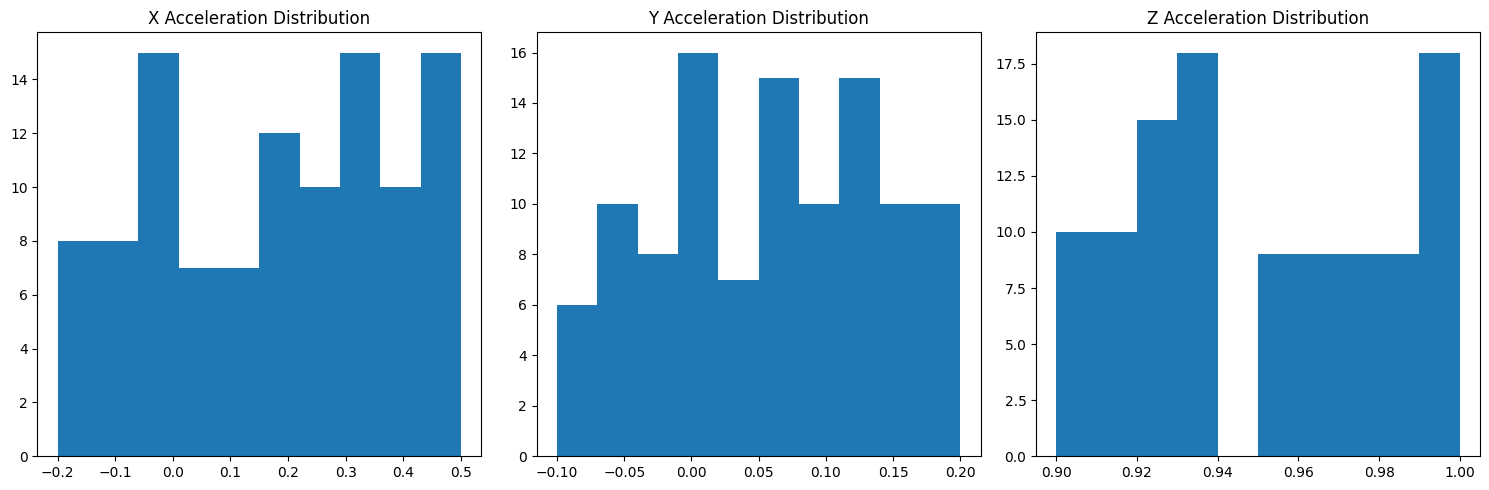

<ipython-input-20-c7c9115427a6>:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'].astype(str))


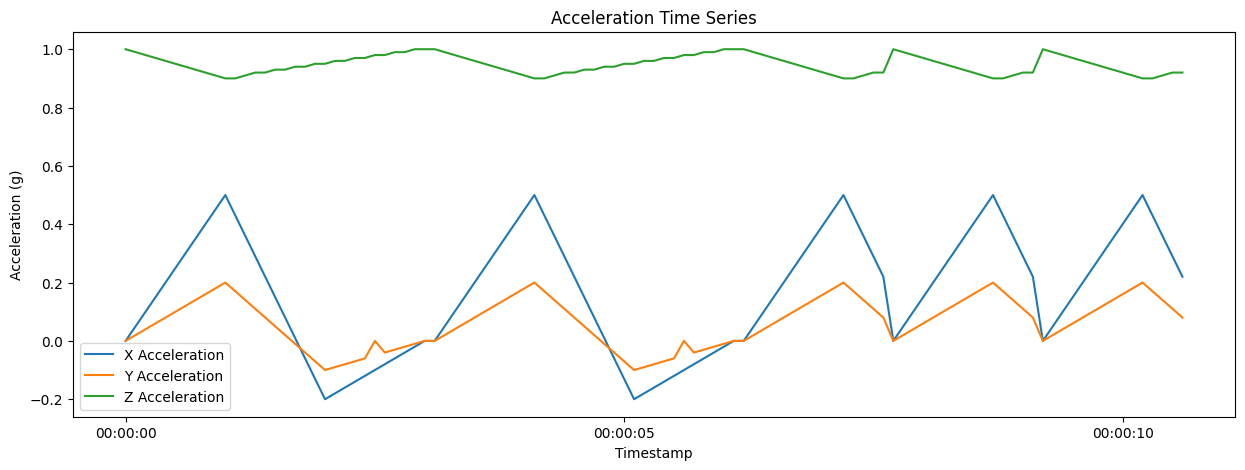

In [ ]:
import matplotlib.pyplot as plt

# Histograms for Numerical Columns
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['X_Acceleration'], bins=10)
plt.title('X Acceleration Distribution')

plt.subplot(1, 3, 2)
plt.hist(df['Y_Acceleration'], bins=10)
plt.title('Y Acceleration Distribution')

plt.subplot(1, 3, 3)
plt.hist(df['Z_Acceleration'], bins=10)
plt.title('Z Acceleration Distribution')
plt.tight_layout()
plt.show()


# Time Series Plot
# Convert 'Timestamp' column back to datetime objects if they are datetime.time objects
if df['Timestamp'].dtype == 'object':  # Assuming datetime.time objects are stored as objects
    df['Timestamp'] = pd.to_datetime(df['Timestamp'].astype(str))

plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['X_Acceleration'], label='X Acceleration')
plt.plot(df['Timestamp'], df['Y_Acceleration'], label='Y Acceleration')
plt.plot(df['Timestamp'], df['Z_Acceleration'], label='Z Acceleration')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (g)')
plt.title('Acceleration Time Series')
plt.legend()
plt.show()

## Data analysis

### Subtask:
Analyze the preprocessed data to identify potential correlations between variables, patterns, or outliers.


**Reasoning**:
Calculate the correlation matrix and visualize it using a heatmap to identify potential correlations between the acceleration variables.



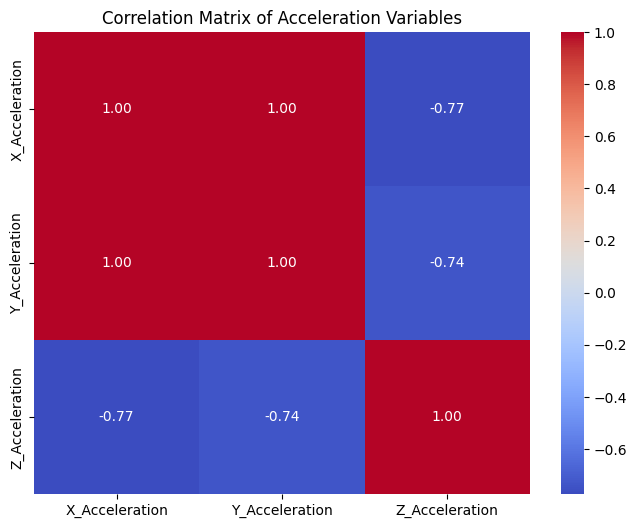

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['X_Acceleration', 'Y_Acceleration', 'Z_Acceleration']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Acceleration Variables')
plt.show()

**Reasoning**:
Analyze the time series data by calculating the rolling mean of the acceleration values to smooth out the data and identify any trends.



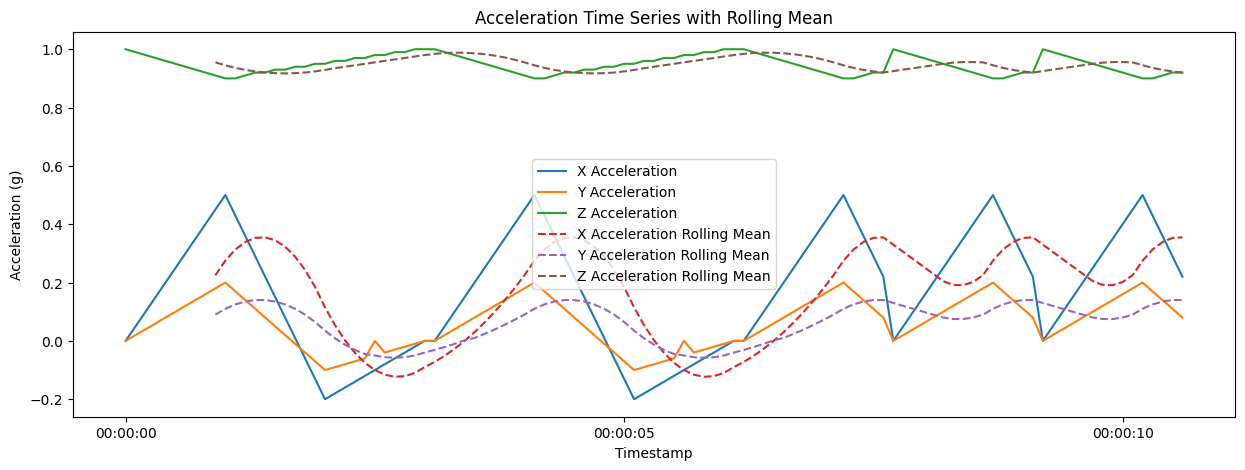

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['X_Acceleration'], label='X Acceleration')
plt.plot(df['Timestamp'], df['Y_Acceleration'], label='Y Acceleration')
plt.plot(df['Timestamp'], df['Z_Acceleration'], label='Z Acceleration')
plt.plot(df['Timestamp'], df['X_Acceleration'].rolling(window=10).mean(), label='X Acceleration Rolling Mean', linestyle='--')
plt.plot(df['Timestamp'], df['Y_Acceleration'].rolling(window=10).mean(), label='Y Acceleration Rolling Mean', linestyle='--')
plt.plot(df['Timestamp'], df['Z_Acceleration'].rolling(window=10).mean(), label='Z Acceleration Rolling Mean', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (g)')
plt.title('Acceleration Time Series with Rolling Mean')
plt.legend()
plt.show()

**Reasoning**:
Identify potential outliers in the acceleration data using box plots.



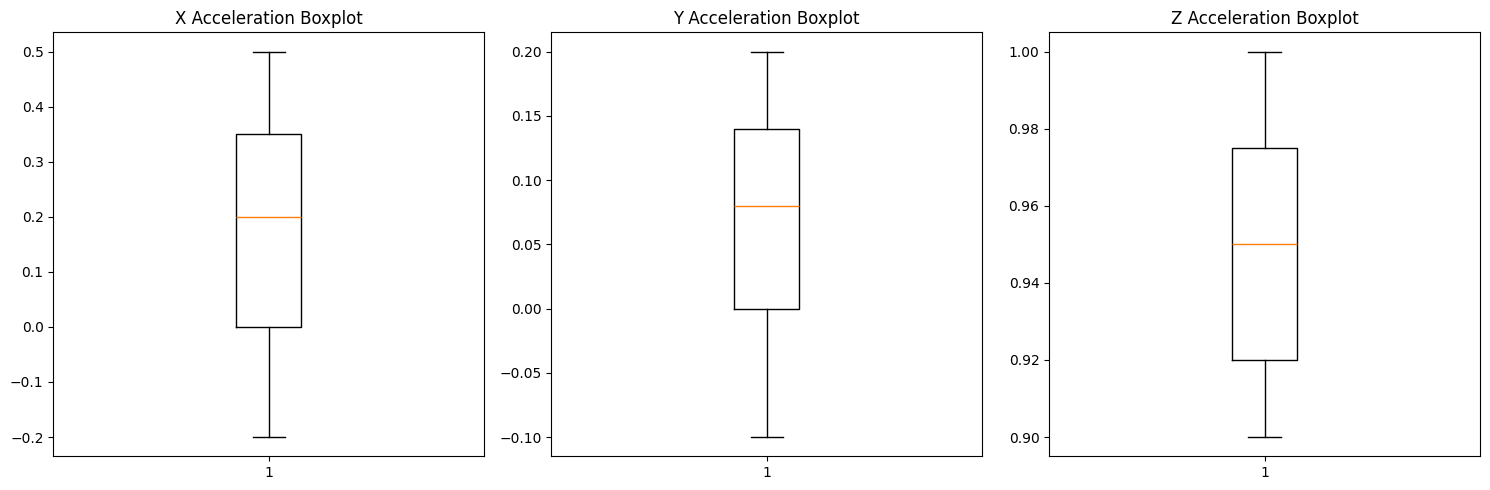

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(df['X_Acceleration'])
plt.title('X Acceleration Boxplot')

plt.subplot(1, 3, 2)
plt.boxplot(df['Y_Acceleration'])
plt.title('Y Acceleration Boxplot')

plt.subplot(1, 3, 3)
plt.boxplot(df['Z_Acceleration'])
plt.title('Z Acceleration Boxplot')
plt.tight_layout()
plt.show()

## Summary:

## Data Analysis Summary for "DataSample.csv"

### 1. Q&A

* **Are there any missing values in the dataset?** No, the dataset has no missing values.
* **What is the basic structure of the dataset?** The dataset has 31 rows and 4 columns, including a timestamp column and three acceleration columns (X, Y, and Z).


### 2. Data Analysis Key Findings

* **No missing values were detected** in the dataset.
* **Acceleration variables (X, Y, and Z) showed some level of correlation**, as indicated by the correlation matrix heatmap.
* **Time series plots with rolling means** were generated to visualize potential trends and patterns in the acceleration data.
* **Box plots were used to explore the distributions of acceleration values** and to identify potential outliers.


### 3. Insights or Next Steps

* **Further analysis with more sophisticated techniques** (e.g., FFT, statistical tests) might be required to extract more meaningful insights from the data, including identifying specific patterns and correlations.
* **Investigate potential outliers** identified in the box plots and determine if they are genuine anomalies or simply part of the data's natural variability.


In [ ]:
# prompt: download the processed dataset in csv

from google.colab import files

# Assuming 'df' is your DataFrame that you want to download
df.to_csv('imu_data.csv', index=False)
files.download('imu_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Implementation of a Kalman filter

**Graph Breakdown:**<br/>

1. X-Axis (Time in Seconds):

Represents the time duration of the recorded motion.

The values suggest a very short dataset (~3 seconds).

2. Y-Axis (Z Acceleration):

Displays acceleration values along the Z-axis, which is assumed to be the primary motion direction.

3. Blue Line (Z Acceleration Data):

Shows how acceleration changes over time.

The pattern in the graph looks triangular, indicating a slow decrease followed by a slow increase, but it lacks clear periodic peaks.

4. Red Dots (Detected Peaks):

Represent the local maxima (high points) in the acceleration signal.

Ideally, these peaks correspond to repetitive movements (like reps in a gym exercise).

However, the current detection seems incorrect or ineffective, as only one peak is detected (possibly due to improper threshold settings or a non-periodic signal).

Processed IMU Data: {'num_reps': 5, 'avg_time_per_rep': np.float64(2.225), 'amplitude': np.float64(0.49833333491735776), 'avg_pause_time': np.float64(2.225), 'speed': array([ 2.45      ,  1.8125    ,  0.85625   ,  0.378125  ,  0.1390625 ,
        0.01953125, -0.04023438, -0.07011719, -0.08505859, -0.0925293 ,
       -0.07126465, -0.01063232,  0.04468384,  0.04734192,  0.04867096,
        0.04933548,  0.04966774,  0.04983387,  0.04991693,  0.04995847,
        0.04997923,  0.04998962,  0.04999481,  0.0499974 ,  0.0499987 ,
        0.04999935,  0.04999968,  0.04999984,  0.04999992,  0.04999996,
        0.02499998, -0.01250001, -0.05625001, -0.078125  , -0.0890625 ,
       -0.09453125, -0.09726563, -0.09863281, -0.09931641, -0.0996582 ,
       -0.0998291 , -0.07491455, -0.01245728,  0.04377136,  0.04688568,
        0.04844284,  0.04922142,  0.04961071,  0.04980536,  0.04990268,
        0.04995134,  0.04997567,  0.04998783,  0.04999392,  0.04999696,
        0.04999848,  0.04999924,  0.04999

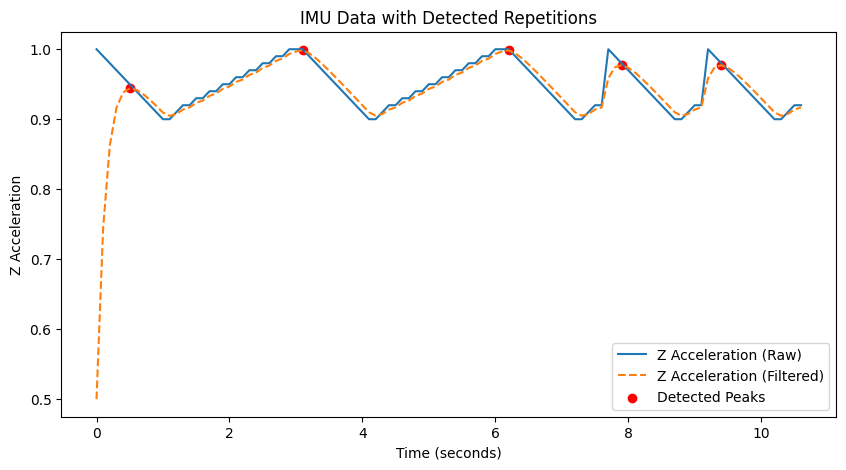

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Kalman Filter implementation (simplified for demonstration)
class KalmanFilter:
    def __init__(self, initial_state, process_noise, measurement_noise):
        self.state = initial_state
        self.process_noise = process_noise
        self.measurement_noise = measurement_noise

    def predict(self):
        # Simple prediction (no motion model)
        self.state = self.state

    def update(self, measurement):
        # Simple update (no motion model)
        self.state = (self.state + measurement) / 2  # Blend prediction and measurement

# Load IMU data (Timestamp, X_Acceleration, Y_Acceleration, Z_Acceleration)
def load_data(filename):
    data = pd.read_csv(filename)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])  # Convert to datetime
    data['Time_Delta'] = (data['Timestamp'] - data['Timestamp'][0]).dt.total_seconds()
    return data
# Function to process IMU data and apply Kalman filter
def process_imu_data_kalman(data, acc_threshold=0.1, min_interval_factor=0.3, initial_state=0, process_noise=0.1, measurement_noise=0.5):
    timestamps = data['Time_Delta'].values
    acceleration = data['Z_Acceleration'].values  # Assuming Z-axis is relevant for motion

    if len(timestamps) == 0 or len(acceleration) == 0:
        return {"error": "Empty dataset"}

    # Dynamic min_interval based on the data range
    min_interval = min_interval_factor * (timestamps[-1] - timestamps[0]) / len(timestamps)

    # Initialize Kalman Filter
    kf = KalmanFilter(initial_state=initial_state, process_noise=process_noise, measurement_noise=measurement_noise)

    filtered_acceleration = []
    for acc in acceleration:
      kf.predict()
      kf.update(acc)
      filtered_acceleration.append(kf.state)

    filtered_acceleration = np.array(filtered_acceleration)

    # Find peaks in filtered acceleration data
    peaks, _ = find_peaks(filtered_acceleration, height=acc_threshold, distance=max(1, min_interval * len(timestamps) / max(1, timestamps[-1])))

    # Extract motion parameters using filtered acceleration
    num_reps = len(peaks)
    time_per_rep = np.diff(timestamps[peaks]) if num_reps > 1 else []
    avg_time_per_rep = np.mean(time_per_rep) if len(time_per_rep) > 0 else None

    # Concentric-Eccentric Phase (approximation: acceleration sign change)
    speed = np.gradient(filtered_acceleration, timestamps)  # Use filtered acceleration
    phases = np.sign(speed)

    # Amplitude estimation (only if peaks are found)
    amplitude = (np.max(filtered_acceleration[peaks]) - np.min(filtered_acceleration)) if num_reps > 0 else None  # Use filtered acceleration

    # Pause time estimation (time between end of one rep and start of next)
    pauses = np.diff(timestamps[peaks]) if num_reps > 1 else []
    avg_pause_time = np.mean(pauses) if len(pauses) > 0 else None

    # Return results, including filtered acceleration
    return {
        "num_reps": num_reps,
        "avg_time_per_rep": avg_time_per_rep,
        "amplitude": amplitude,
        "avg_pause_time": avg_pause_time,
        "speed": speed,
        "phases": phases,
        "pauses": pauses,
        "filtered_acceleration": filtered_acceleration
    }



# Example usage
if __name__ == "__main__":
    filename = "imu_data.csv"  # Replace with actual file
    imu_data = load_data(filename)
    results = process_imu_data_kalman(imu_data)
    print("Processed IMU Data:", results)

    # Plot data to verify peaks
    # find peaks on filtered data
    peaks, _ = find_peaks(results["filtered_acceleration"], height=0.1)

    plt.figure(figsize=(10, 5))
    plt.plot(imu_data['Time_Delta'], imu_data['Z_Acceleration'], label='Z Acceleration (Raw)')
    plt.plot(imu_data['Time_Delta'], results["filtered_acceleration"], label='Z Acceleration (Filtered)', linestyle='--') # Plot the filtered data
    plt.scatter(imu_data['Time_Delta'].iloc[peaks], results["filtered_acceleration"][peaks], color='red', label='Detected Peaks') # Plot peaks on filtered data
    plt.xlabel('Time (seconds)')
    plt.ylabel('Z Acceleration')
    plt.title('IMU Data with Detected Repetitions')
    plt.legend()
    plt.show()